In [1]:
# Script to reformat the parameter file into (ms, gs2, gw2, gp2, gd2, kappa, lambda, zeta, lambdav)
import numpy as np
params = np.loadtxt("validation_DINO.txt")
n = len(params)

# reformat
with open("validation_DINO_RBM.txt", "w") as output_file:
    for i in range(n):
        print(f"{params[i][12]}", file=output_file, end='  ')
        for j in range(0,7):
            print(f"{params[i][j]}", file=output_file, end='  ')
        print(f"{params[i][8]}", file=output_file, end='  ')
        print("",file=output_file)

In [1]:
import bulk2params as trans
import numpy as np
import random
data = np.loadtxt("burnin_out_0.txt")

def get_unique_rand_samp(b, N):
    # Check if N is larger than the range of unique numbers available
    if N > (b + 1):
        raise ValueError("N is larger than the range of unique numbers available in the interval")

    # Use random.sample to generate unique random integers
    random_integers = random.sample(range(0, b), N)
    return random_integers

# generate 100 random samples, 50 for training and 50 for validation
b = len(data)
n_training = 50
n_validation = 50
N = n_training + n_validation
indexes = get_unique_rand_samp(b, N)

# create a list of bulks
bulks = []
for i in range(N):
    row = indexes[i]
    bulks.append(data[row,:])
bulks = np.array(bulks)

# convert bulks to params
params = []
for i in range(N):
    param_set, flag = trans.get_parameters(bulks[i,0],bulks[i,1],bulks[i,2],bulks[i,3],bulks[i,4],bulks[i,5],bulks[i,6],bulks[i,7],bulks[i,8],782.5,763.0,980.0)
    params.append(param_set)
params = np.array(params)

# print our training and validation params
with open("training_DINO.txt", "w") as output_file:
    for i in range(n_training):
        for j in range(1,8):
            print(f"{params[i][j]}", file=output_file, end='  ')
        print(f"0.0  {params[i][8]}  0.0  0.0  0.0", file=output_file, end='  ')
        print(f"{params[i][0]} 782.5  763.0  980.0", file=output_file)

with open("validation_DINO.txt", "w") as output_file:
    for i in range(n_training,n_training+n_validation):
        for j in range(1,8):
            print(f"{params[i][j]}", file=output_file, end='  ')
        print(f"0.0  {params[i][8]}  0.0  0.0  0.0", file=output_file, end='  ')
        print(f"{params[i][0]} 782.5  763.0  980.0", file=output_file)

[720, 268, 667, 31, 964, 686, 752, 303, 744, 1129, 611, 1151, 229, 646, 140, 535, 202, 30, 786, 269, 784, 561, 918, 484, 1158, 206, 11, 249, 592, 392, 679, 1156, 997, 27, 865, 830, 932, 156, 1017, 746, 556, 326, 168, 117, 1038, 619, 486, 313, 1082, 860, 201, 1003, 664, 346, 976, 691, 195, 196, 633, 888, 965, 380, 347, 218, 567, 432, 1153, 721, 703, 709, 741, 457, 1064, 839, 1169, 562, 310, 464, 791, 851, 529, 818, 232, 470, 670, 954, 359, 739, 925, 519, 846, 307, 919, 273, 381, 253, 260, 805, 436, 20]


In [4]:
n_runs = 250000     # number of total monte carlo samples needed
n_chains = 4       # number of MCMC chains
n_burnin = 10000    # number of runs taken as burnin
t_burnin = 17700    # time taken for burnin on average
t_days = (n_runs/(n_chains*n_burnin) + 1)*t_burnin/(3600*24)
print(t_days,"days to get posterior")

t_run = 17700/(8*n_burnin)
t_observables = t_run*n_runs
print(t_observables/3600,"hours to compute all observables for Posterior")

t_hf = 160  # time in seconds for high fidelity of 10 nuclei
n_runs_hf = 500
t_days_hf = t_hf*n_runs_hf/(3600*24)
print(f"{n_runs_hf} high fidelity runs to error check would take {t_days_hf} days")


1.4852430555555556 days to get posterior
15.364583333333334 hours to compute all observables for Posterior
500 high fidelity runs to error check would take 0.9259259259259259 days


7404
[[-1.62225359e+01  1.51000000e-01  5.97000000e-01 ...  2.50000000e+02
   3.20000000e-02  4.91500000e+02]
 [-1.62225359e+01  1.51000000e-01  5.95892145e-01 ...  2.50000000e+02
   3.20000000e-02  4.91500000e+02]
 [-1.62225359e+01  1.51000000e-01  5.95892145e-01 ...  2.50000000e+02
   3.20000000e-02  4.91500000e+02]
 ...
 [-1.62132588e+01  1.49505762e-01  5.95677554e-01 ...  1.55977724e+02
   2.85653219e-02  4.95068833e+02]
 [-1.62132588e+01  1.49505762e-01  5.95677554e-01 ...  1.55977724e+02
   2.99630911e-02  4.95068833e+02]
 [-1.62132588e+01  1.49586611e-01  5.95677554e-01 ...  2.41015082e+02
   2.99630911e-02  4.95068833e+02]]


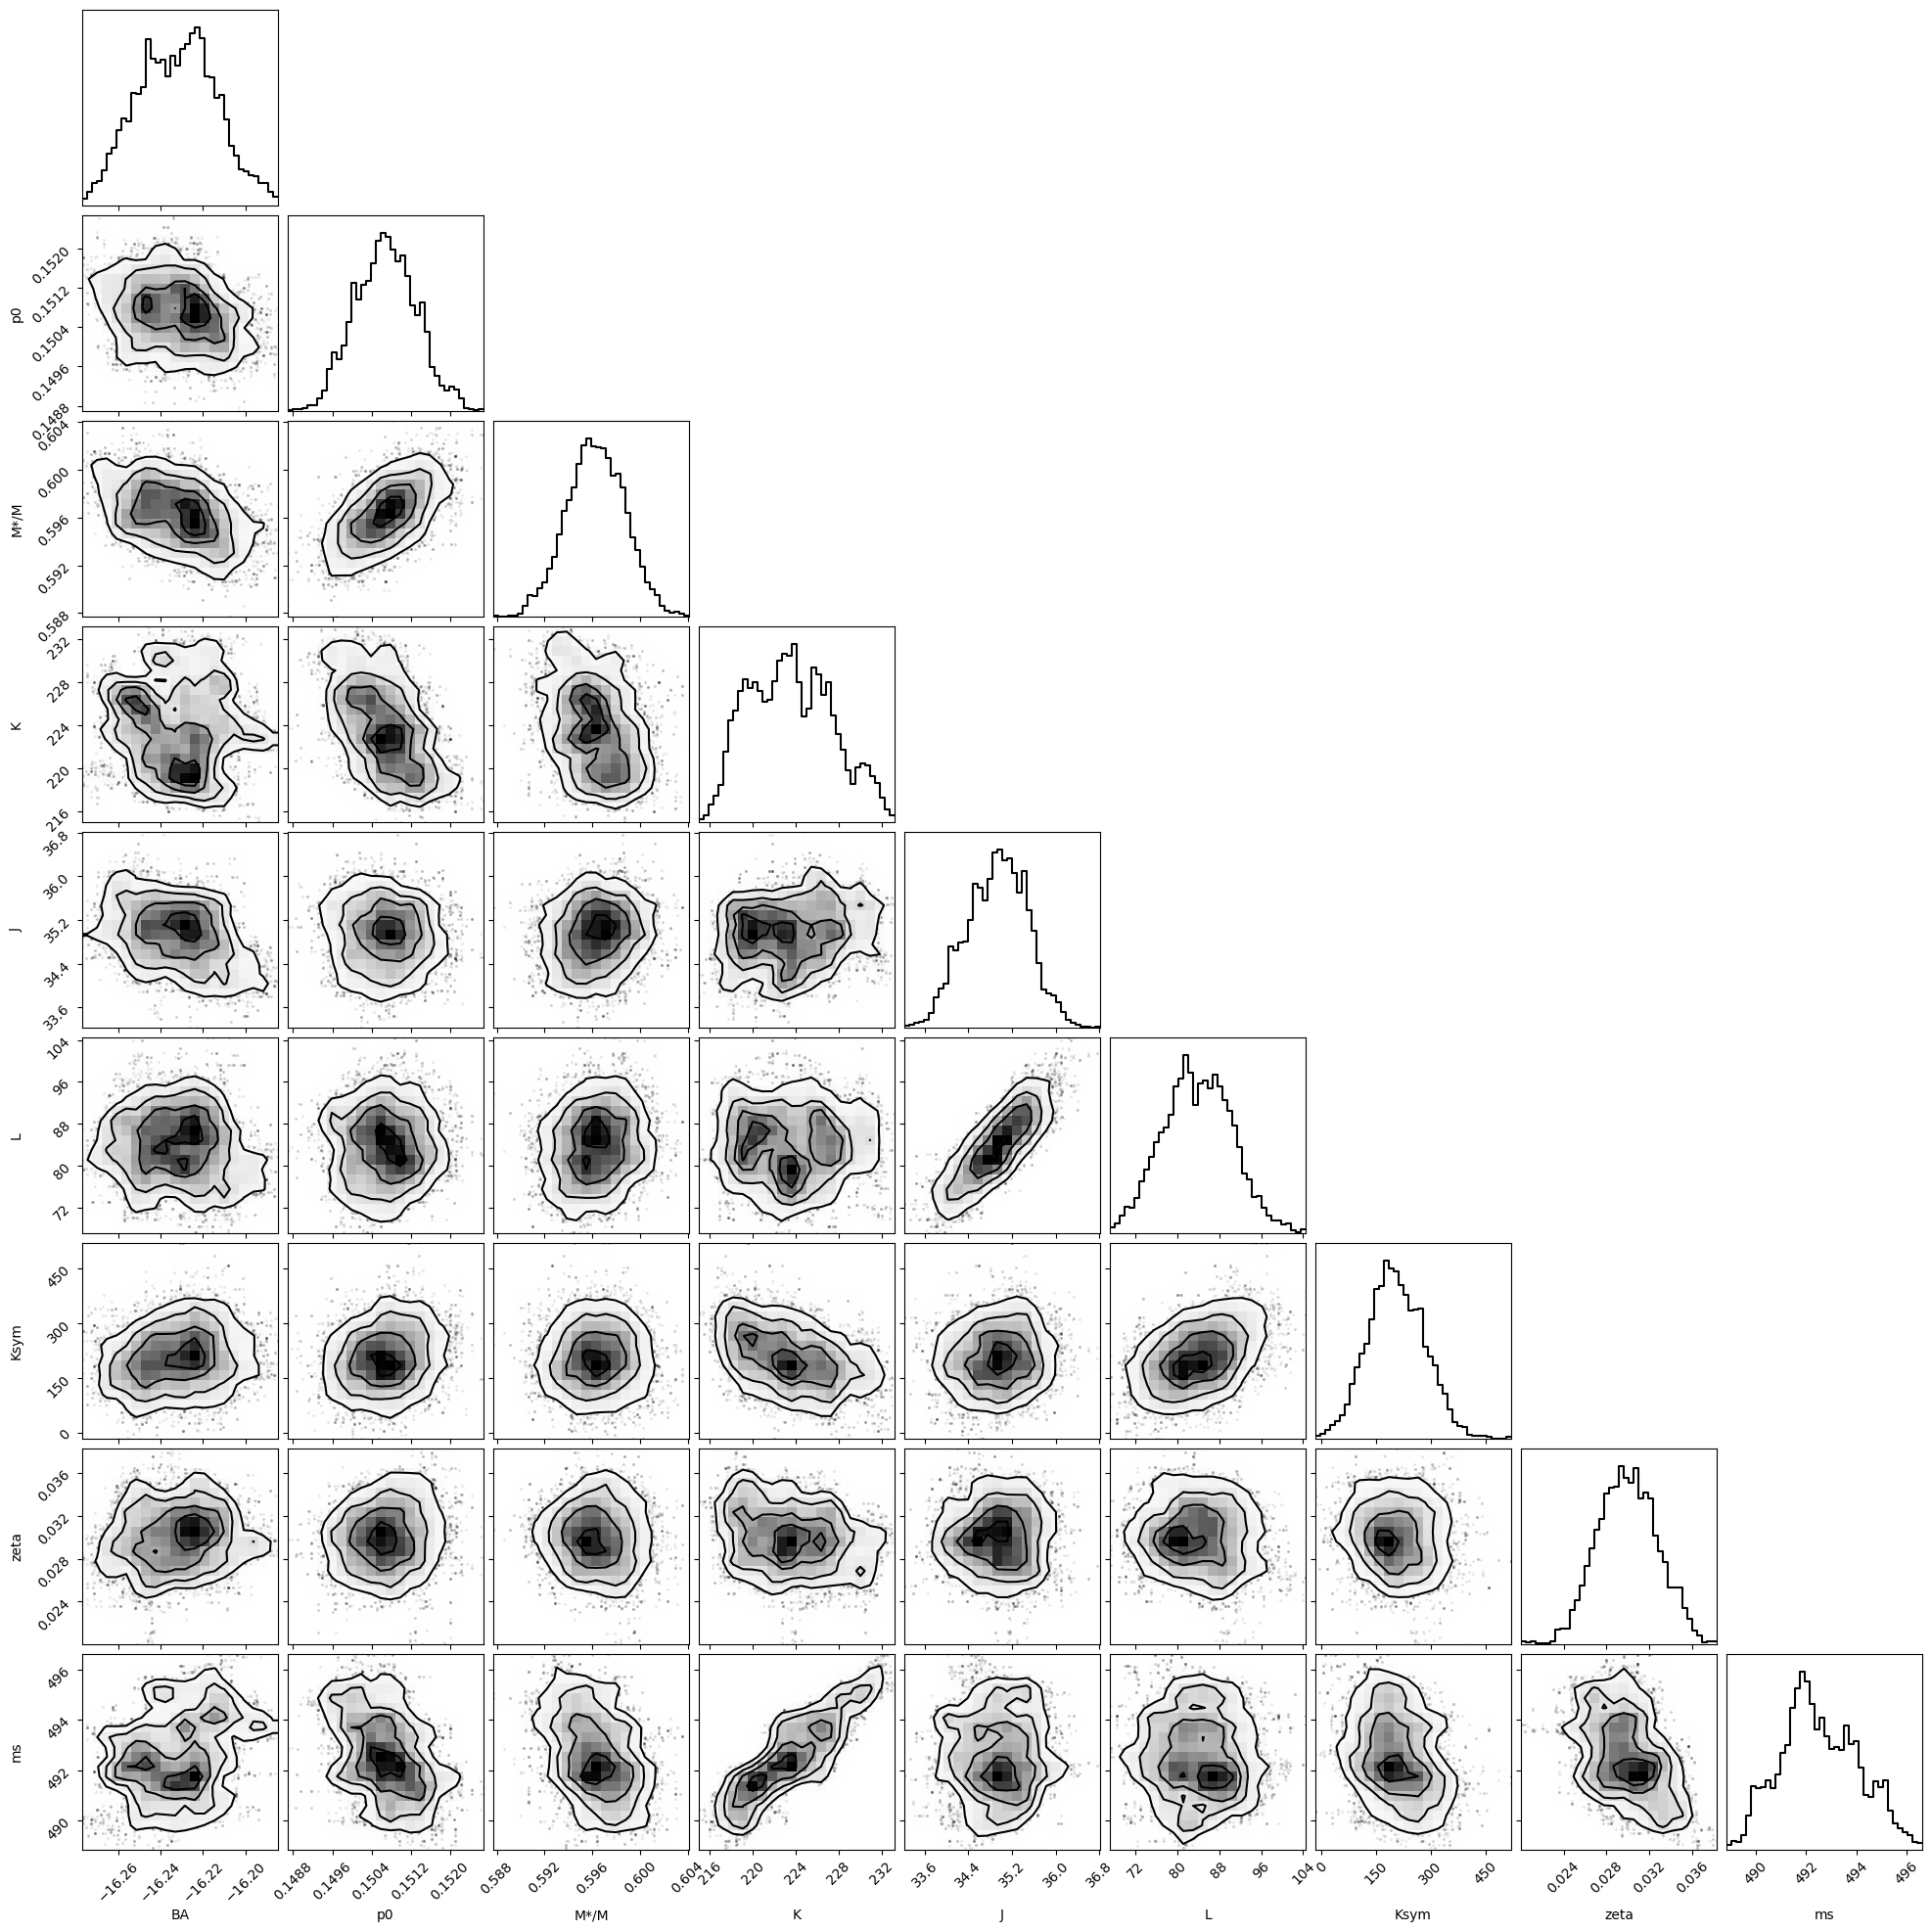

In [3]:
import corner
import numpy as np
import matplotlib.pyplot as plt
samples = np.loadtxt("mcmc_burn_in.txt")

c_samples = []
i=0
while (i < len(samples)):
    c_samples.append(samples[i,:])
    i += 1
c_samples = np.array(c_samples)
print(len(c_samples))
print(c_samples)

ranges = [(480,504),(0.146,0.155),(-16.4,-16.14),(0.58,0.62),(200,260),(0,0.06),(30,42),(50,210),(0,500)]
figure = corner.corner(c_samples,labels=["BA","p0","M*/M","K","J","L","Ksym","zeta","ms"],hist_bin_factor=[2.0]*9,smooth=0.7,smooth1d=0.6,bins=[20]*9)
plt.savefig("Corner.png",transparent=False,facecolor='white')

In [1]:
import statistics
import numpy as np
posterior = np.loadtxt("burnin_out_0.txt")
for i in range(30):
    print(f"{statistics.mean(posterior[:,i])}  {statistics.stdev(posterior[:,i])}  {min(posterior[:,i])}  {max(posterior[:,i])}")


-16.255771329120826  0.024032468126780802  -16.31500628293241  -16.18045204044139
0.15144868432286787  0.0007365658810037902  0.14976269271191844  0.15372295029471902
0.5973845253162476  0.003773677564202287  0.5863283688918813  0.6091455541229908
219.9758528066384  2.6284509600053565  213.53133917615898  225.97601218693455
35.26322350875311  0.8338971361324543  32.74730053769069  37.42164060481129
86.96280315401651  10.262553353906286  51.98053549800025  110.38014829303008
234.79905342257834  76.51092372860451  31.949779795264824  517.535316594554
0.02548755705264176  0.0046227920612753985  0.011797622388736894  0.035362573829185485
491.37935587190697  1.0804094313030144  488.68328498434613  493.60129940892966


IndexError: index 9 is out of bounds for axis 1 with size 9

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 1 0
6 1 1
7 1 2
8 1 3
9 1 4
10 2 0
11 2 1
12 2 2
13 2 3
14 2 4
15 3 0
16 3 1
17 3 2
18 3 3
19 3 4
20 4 0
21 4 1


AttributeError: 'numpy.ndarray' object has no attribute 'axis'

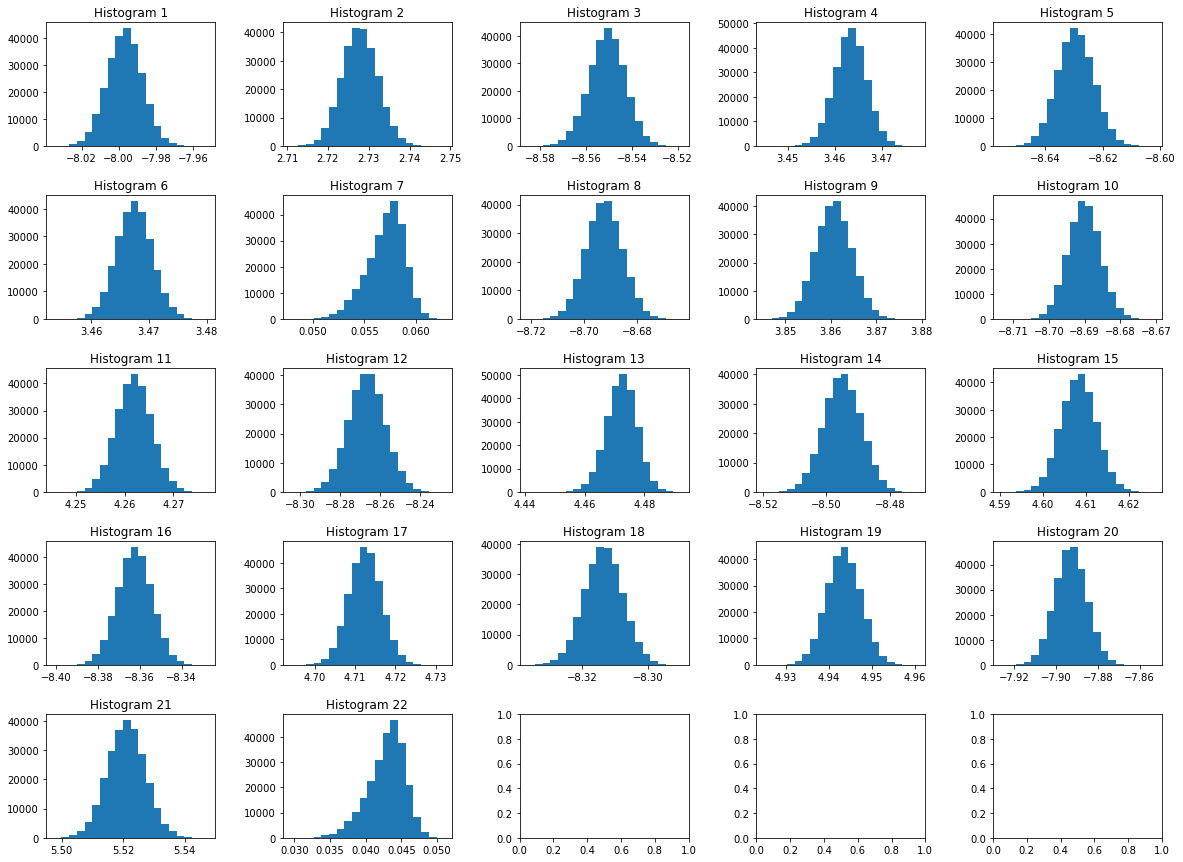

In [425]:
import numpy as np
import matplotlib.pyplot as plt

posterior = np.loadtxt("Posterior_noskin.txt")

# Generate random data for demonstration
np.random.seed(0)
data = posterior[:,8:30]

# Create subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot histograms
for i in range(5):
    for j in range(5):
        if ((i*5 + j) > 21):
            axs.axis('off')
        else:
            axs[i, j].hist(data[:, i * 5 + j], bins=20)
            axs[i, j].set_title(f'Histogram {i*5 + j + 1}')
        print(i*5 +j,i,j)

# Plot remaining two histograms in the last row
for k in range(2):
    axs[4, k].hist(data[:, 20 + k], bins=20)
    axs[4, k].set_title(f'Histogram {20 + k + 1}')

# Hide empty subplots
for ax in axs.flat:
    if not ax.get_title():
        ax.axis('off')

plt.tight_layout()
plt.show()